# Proving Programs Terminate using ...

# A Proof Using the Order (N, ≤)

### Não está a funcionar - nem a ser usado

In [ ]:
 def place_parenthesis(s):
    #converte expressões matemáticas em expressões passíveis
    #de interpretação em https://microsoft.github.io/z3guide/playground/Freeform%20Editing/
    #por exemplo, x1+x2*3 --> (+ x1 (* x2 3))
    
    # ^ (*/) (+-)
            
    def conversion_by_symbol(symbol_to_found, string):
        i = 0
        while i<len(string):
            print(string)
            if string[i] == symbol_to_found:
                #add (
                parentheses_counter = 0
                c = string[i-1]
                j = i-1
                ok = True
                while c not in ['^','*','/','+','-'] and j>0 and (parentheses_counter!=0 or ok):
                    j -= 1
                    c = string[j] if j>0 else symbol_to_found
                    if c=='(':
                        ok = False
                        parentheses_counter -= 1
                    elif c==')':
                        ok = False
                        parentheses_counter += 1
                            
                string = string[:j] + '(' + string[j:]
                
                i += 1 #porque se adicionou ( à esquerda 
                
                #add )
                parentheses_counter = 0
                c = string[i+1]
                j = i+1
                ok = True
                while c not in ['^','*','/','+','-'] and j<len(string) and (parentheses_counter!=0 or ok):
                    j += 1
                    c = string[j] if j<len(string) else symbol_to_found
                    if c=='(':
                        ok = False
                        parentheses_counter -= 1
                    elif c==')':
                        ok = False
                        parentheses_counter += 1
                            
                string = string[:j] + ')' + string[j:]
                
            i += 1
            
        return string
        
    for symbol in ['^', '*', '/', '+', '-']:
        s = conversion_by_symbol(symbol, s)
    
    return s

In [2]:
def conversion_by_symbol(symbol_to_found, string, symbol_to_add):
        # 0 to add (  and 1 to add )
        res = string
        if symbol_to_add == 0:
            parentheses_left_index = []
            for i in range(len(string)):
                if string[i]==symbol:
                    c = string[i-1]
                    j = i-1
                    while c not in ['^','*','/','+','-'] and j>=0:
                        j -= 1
                        c = string[j] if j>0 else symbol
                        
                    parentheses_left_index += [j+1]
            
            if len(parentheses_left_index)>0:
                res = string[:parentheses_left_index[0]] + '('
                for i in range(len(parentheses_left_index)-1):
                    res += string[parentheses_left_index[i]:parentheses_left_index[i+1]] + '('
                res += string[parentheses_left_index[-1]:]
        else:
            parentheses_right_index = []
            for i in range(len(string)):
                if string[i]==symbol:
                    c = string[i+1]
                    j = i+1
                    while c not in ['^','*','/','+','-'] and j<len(string):
                        j += 1
                        c = string[j] if j<len(string) else symbol
                    parentheses_right_index += [j]
                    
            if len(parentheses_right_index)>0:
                res = string[:parentheses_right_index[0]] + ')'
                for i in range(len(parentheses_right_index)-1):
                    res += string[parentheses_right_index[i]:parentheses_right_index[i+1]] + ')'
                res += string[parentheses_right_index[-1]:]
            
        return res

In [3]:
def conversion_by_symbol(symbol_to_found, string):
        i = 0
        while i<len(string):
            if string[i] == symbol_to_found:
                
                #add (
                parentheses_counter = 0
                j = i-1
                c = string[j]
                ok = False #ok sse já apareceu "(" ou ")"
                if c=='(':
                    ok = True
                    parentheses_counter -= 1
                elif c==')':
                    ok = True
                    parentheses_counter += 1
                while j>=0 and (not ok or parentheses_counter==0) and (c not in ['^','*','/','+','-'] or parentheses_counter==0):
                    j -= 1
                    c = string[j] if j>=0 else symbol_to_found
                    if c=='(':
                        ok = True
                        parentheses_counter -= 1
                    elif c==')':
                        ok = True
                        parentheses_counter += 1
                            
                string = string[:j+1] + '(' + string[j+1:]
                
                i += 1 #porque se adicionou ( à esquerda 
                
                #add )
                parentheses_counter = 0
                j = i+1
                c = string[j]
                ok = False #ok sse já apareceu "(" ou ")"
                if c=='(':
                    ok = True
                    parentheses_counter -= 1
                elif c==')':
                    ok = True
                    parentheses_counter += 1
                while j>=0 and (not ok or parentheses_counter==0) and (c not in ['^','*','/','+','-'] or parentheses_counter==0):
                    j += 1
                    c = string[j] if j<len(string) else symbol_to_found
                    if c=='(':
                        ok = True
                        parentheses_counter -= 1
                    elif c==')':
                        ok = True
                        parentheses_counter += 1
                            
                string = string[:j] + ')' + string[j:]
                
            i += 1
            
        return string

---------------------------------------------------

### Pedro Antunes

In [4]:
def megaf(string):
    string = conversion_by_symbol({'+','-'}, string)
    string = conversion_by_symbol({'*','/'}, string)
    string = conversion_by_symbol({'^'}, string)
    return string

def conversion_by_symbol(symbol_list, string):
    found = False
    brackets_open = -1
    brackets_close = len(string)
    i = 0
    
    while i<len(string) and not found:
        if string[i] in symbol_list:
            found = True
            for j in range(0,i,1):
                if string[j] == '(':
                    brackets_open = j
            for j in range(len(string)-1,i,-1):
                if string[j] == ')':
                    brackets_close = j
            string = string[:brackets_open+1] + '(' + conversion_by_symbol(symbol_list, string[brackets_open+1:i]) + ')' + string[i] + '(' + conversion_by_symbol(symbol_list, string[i+1:brackets_close]) + ')' + conversion_by_symbol(symbol_list, string[brackets_close:]) 
            
        i = i+1
        
    return string

In [5]:
megaf('(1+2)*(3+4)')

'((1)+((2)))*(((3))+(4))'

In [6]:
megaf('1+(2*5)')

'(1)+(((2)*(5)))'

In [7]:
def clump_left(string, index):
    if string[index] in [')','}']:
        level = 1
        i = index - 1
        while level != 0:
            if string[i] in [')','}']:
                level = level + 1
            elif string[i] in ['(','{']:
                level = level - 1
            i = i - 1
        return i + 1
    else:
        i = index
        while i > 0 and (string[i-1].isnumeric() or string[i-1]=='x'):
            i = i - 1
        return i
    
def clump_right(string, index):
    if string[index] in ['(','{']:
        level = 1
        i = index + 1
        while level != 0:
            if string[i] in ['(','{']:
                level = level + 1
            elif string[i] in [')','}']:
                level = level - 1
            i = i + 1
        return i - 1
    else:
        i = index
        while i < len(string)-1 and (string[i+1].isnumeric() or string[i+1]=='x'):
            i = i + 1
        return i
    
def insert(string, expression, index):
    return string[:index] + expression + string[index:]

def operator_process(string, operator_list):
    i = 0
    while i < len(string):
        if string[i] in operator_list:
            l = clump_left(string, i-1)
            r = clump_right(string, i+1)
            string = insert(string, '(', l)
            string = insert(string, ')', r+2)
            i = i + 2
        i = i + 1
    return string

def place_parenthesis(string):
    operator_priority = [['^'],['*','/'],['+','-']]
    string = string.replace('(', '{')
    string = string.replace(')', '}')
    for operators in operator_priority:
        string = operator_process(string, operators)
    string = string.replace('{', '')
    string = string.replace('}', '')
    return string

#Ex: place_parenthesis('(1+3)^2*6-5/(2)', [['^'],['*','/'],['+','-']])

### Using z3 online

In [1]:
def clump_left(string, index):
    if string[index] in [')','}']:
        level = 1
        i = index - 1
        while level != 0:
            if string[i] in [')','}']:
                level = level + 1
            elif string[i] in ['(','{']:
                level = level - 1
            i = i - 1
        return i + 1
    else:
        i = index
        while i > 0 and (string[i-1].isnumeric() or string[i-1]=='x'):
            i = i - 1
        return i
    
def clump_right(string, index):
    if string[index] in ['(','{']:
        level = 1
        i = index + 1
        while level != 0:
            if string[i] in ['(','{']:
                level = level + 1
            elif string[i] in [')','}']:
                level = level - 1
            i = i + 1
        return i - 1
    else:
        i = index
        while i < len(string)-1 and (string[i+1].isnumeric() or string[i+1]=='x'):
            i = i + 1
        return i
    
def insert(string, expression, index):
    return string[:index] + expression + string[index:]

def operator_process(string, operator_list):
    i = 0
    while i < len(string):
        if string[i] in operator_list:
            l = clump_left(string, i-1)
            r = clump_right(string, i+1)
            string = insert(string, '(', l)
            string = insert(string, ')', r+2)
            i = i + 2
        i = i + 1
    return string

def place_parenthesis(string):
    #given an expression in the usual way the program returns
    #the expression with parenthesis
    
    operator_priority = [['^'],['*','/'],['+','-']]
    string = string.replace('(', '{')
    string = string.replace(')', '}')
    for operators in operator_priority:
        string = operator_process(string, operators)
    string = string.replace('{', '')
    string = string.replace('}', '')
    return string

#Ex: place_parenthesis('(1+3)^2*6-5/(2)', [['^'],['*','/'],['+','-']])

-----------------------------------------------------------

In [2]:
def converter(string:str):
    #From an expression with parenthesis (like the output of place_parenthesis) 
    #it returns expressions of the form needed to Z3
    
    operation_list = ['^','*','/','+','-']
    
    def operations_counter(string):
        counter = 0
        for c in string:
            if c in operation_list:
                counter += 1
        return counter
    
    def aux(string):
        if operations_counter(string)==0: #f(x) onde f(x) não tem operações -> f(x)
            return string
        #(x1+x2) -> (+ x1 x2)
        else: #(f(x) + g(x)) -> (+ aux(f(x)) aux(g(x)))
            string = string[1:-1]
            if '(' not in string:
                i = 0
                found = False
                while i<len(string) and not found:
                    if string[i] in operation_list:
                        found = True
                    else:
                        i+=1
                        
            else:
                level = 0
                i = 0
                if string[i]=='(':
                    level -= 1
                elif string[i]==')':
                    level += 1
                while i<len(string) and level!=0:
                    i += 1
                    if string[i]=='(':
                        level -= 1
                    elif string[i]==')':
                        level += 1
                i += 1                                      
                
            op = string[i]
            s1 = string[:i]
            s2 = string[i+1:]

            return '(%s %s %s)'%(op, aux(s1), aux(s2))

    return aux(string)

In [3]:
def to_check(n,f,G):
    #It returns the commands to run on https://microsoft.github.io/z3guide/playground/Freeform%20Editing/ 
    #to test if not(f(g(x))<f(x)) is unsat
    
    #G é da forma (..., ..., ... ...)
    
    print('\nRun the following:\n')
    print('-----')
    #declaração das constantes
    print(';declare constant')
    for i in range(n):
        print('(declare-const x%d Int)'%(i+1))
    
    for i in range(n):
        print('(assert (> x%d 0))'%(i+1))
        
    #retirar espaços a G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #retirar os parêntesis
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projeção 1 de g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projeção m de g
        
    fog = f #substituir as ocorrências em f de x1 por g1(x), x2 por g2(x), etc.
    for i in range(n):
        fog = fog.replace('x%d'%(i+1), gs[i])
    
    print('(assert (not (< %s %s)))'%(converter(place_parenthesis(fog)), converter(place_parenthesis(f))))
    print('(echo "Answer:") ')
    print('(check-sat)')
    print('-----')

In [4]:
def number_of_variables(exp:str):
    #It returns the number of variables of the input expression 
    list_variable = []
    i = 0
    while i<len(exp):
        if exp[i]=='x':
            i += 1
            variable = ''
            while i<len(exp) and exp[i] in ['0','1','2','3','4','5','6','7','8','9']:
                variable += exp[i]
                i += 1
            list_variable += [int(variable)]
        else:
            i+=1
            
    return max(list_variable)

### main

In [5]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    m = int(input('m = '))
    f = input('f(x) = ')
    i = 1
    ans = 'unsat'
    n_f = number_of_variables(f)
    while i<=m and ans=='unsat':
        g = input('g%d? '%i)
        n_g = number_of_variables(g)
        to_check(max(n_f,n_g),f,g)
        ans = input('Answer: ')
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('\nunknown')
        return 'unknown'
if __name__ == "__main__":
    main()   

m = 3
f(x) = x1+x2+x3
g1? (x1+1,x2-1,x3-1)

Run the following:

-----
;declare constant
(declare-const x1 Int)
(declare-const x2 Int)
(declare-const x3 Int)
(assert (> x1 0))
(assert (> x2 0))
(assert (> x3 0))
(assert (not (< (- (+ (- (+ (+ x1 1) x2) 1) x3) 1) (+ (+ x1 x2) x3))))
(echo "Answer:") 
(check-sat)
-----
Answer: unsat
g2? (x1-1,x2+1,x3-1)

Run the following:

-----
;declare constant
(declare-const x1 Int)
(declare-const x2 Int)
(declare-const x3 Int)
(assert (> x1 0))
(assert (> x2 0))
(assert (> x3 0))
(assert (not (< (- (+ (+ (+ (- x1 1) x2) 1) x3) 1) (+ (+ x1 x2) x3))))
(echo "Answer:") 
(check-sat)
-----
Answer: unsat
g3? (x1-1, x2-1, x3+1)

Run the following:

-----
;declare constant
(declare-const x1 Int)
(declare-const x2 Int)
(declare-const x3 Int)
(assert (> x1 0))
(assert (> x2 0))
(assert (> x3 0))
(assert (not (< (+ (+ (- (+ (- x1 1) x2) 1) x3) 1) (+ (+ x1 x2) x3))))
(echo "Answer:") 
(check-sat)
-----
Answer: unsat

The program is finite.


------------------------------

x1+x2+x3

g1(x) = (x1+1,x2-1,x3-1)

g2(x) = (x1-1,x2+1,x3-1)

g3(x) = (x1-1, x2-1, x3+1)

------------------------------

### z3-solver

In [3]:
from z3 import *

In [17]:
q = Bool('q')
my_false_theorem = Implies(q,p)
my_false_theorem

Implies(q, p)

In [18]:
prove(my_false_theorem)

counterexample
[p = False, q = True]


In [19]:
p, q, r = Bools('p q r')
prove(Implies(And(Implies(p,q), Implies(q,r)), Implies(p,r)))

proved


In [20]:
s = Solver()
s.add(Not(Implies(And(Implies(p,q), Implies(q,r)), Implies(p,r))))
s.check()

unsat

In [6]:
p, q, r = Bools('p q r')
s = Solver()
s.add(Or(p))
s.check()

sat

_____________________

### Proving that it is finite

In [12]:
def function_trusted(f:str):
    #returns 1 iff all characters used are admissible
    char_trusted = ['(',')','^','*','/','+','-','0','1','2','3','4','5','6','7','8','9','x','n','m']
    i = 0
    ok = True
    while i<len(f) and ok:
        if f[i] not in char_trusted:
            ok = False
        else:
            i += 1
    return ok

In [2]:
def number_of_variables(exp:str):
    #It returns the number of variables of the input expression 
    list_variable = []
    i = 0
    while i<len(exp):
        if exp[i]=='x':
            i += 1
            variable = ''
            while i<len(exp) and exp[i] in ['0','1','2','3','4','5','6','7','8','9']:
                variable += exp[i]
                i += 1
            list_variable += [int(variable)]
        else:
            i+=1
            
    return max(list_variable)

In [10]:
def solver_N(n_variables,f,G):
    #It returns the SMT value of not(f(g(x))<f(x)) (unsat, sat or unkown)
    
    assert function_trusted(f)
    
    #G é da forma (..., ..., ... ...)
    
    s = Solver()
    
    x = [0 for _ in range(n_variables)]
    
    #declaração das constantes
    n = Int('n')
    m = Int('m')
    s.add(m>0)
    for i in range(n_variables):
        exec("x%d = Int('x%d')"%(i+1,i+1))
        exec("s.add(x%d > 0)"%(i+1))
        
    #retirar espaços a G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #retirar os parêntesis
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projeção 1 de g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projeção m de g
    
    for function_g in gs:
        assert function_trusted(function_g)
        
    fog = f #substituir as ocorrências em f de x1 por g1(x), x2 por g2(x), etc.
    for i in range(n_variables):
        fog = fog.replace('x%d'%(i+1), gs[i])
    
    s.add(Not(eval(fog) < eval(f)))

    return str(s.check())

In [13]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    m = int(input('m = '))
    f = input('f(x) = ')
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    com = ''
    if m<6:
        for i in range(m):
            com += '%d,'%(i+1)
        com = com[:-1] #to exclude the last comma
    else:
        com = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%com)
    
    i = 1
    ans = 'unsat'
    n_f = number_of_variables(f)
    while i<=m and ans=='unsat':
        print('   if command == %d:'%i)
        g = input('      x = ')
        n_g = number_of_variables(g)

        ans = solver_N(max(n_f,n_g),f,g)
        
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\n\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()

m = 3
f(x) = x1+x2+x3

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3)
   if command == 1:
      x = (x1-1,x2-1,x3+1-m)
   if command == 2:
      x = (x1-1,x2+1,x3-1+m)


The programa is not finite.


x1+x2+x3

g1(x) = (x1-1,x2-1,x3+1)

g2(x) = (x1-1,x2+1,x3-1)

g3(x) = (x1-1, x2-1, x3+1)

In [27]:
p, q, r = Bools('p q r')
Or(p,q,r,Or(q,p))

Or(p, q, r, Or(q, p))

# A Proof Using the Lexicographic Order

In [1]:
from z3 import *

In [2]:
def function_trusted(f:str):
    char_trusted = ['^','*','/','+','-','0','1','2','3','4','5','6','7','8','9','x','n']
    i = 0
    ok = True
    while i<len(f) and ok:
        if f[i] not in char_trusted:
            ok = False
        else:
            i += 1
    return ok

In [3]:
def number_of_variables(exp:str):
    #It returns the number of variables of the input expression 
    list_variable = []
    i = 0
    while i<len(exp):
        if exp[i]=='x':
            i += 1
            variable = ''
            while i<len(exp) and exp[i] in ['0','1','2','3','4','5','6','7','8','9']:
                variable += exp[i]
                i += 1
            list_variable += [int(variable)]
        else:
            i+=1
            
    return max(list_variable)

In [4]:
def solver_N_lex(n_variables:int, G:str) -> str:
    #It returns the SMT value of not(g(x)<x) (unsat, sat or unkown)    
    #G is of the form (..., ..., ... ..., ...)
    
    s = Solver()
    
    #declaração das constantes
    n = Int('n')
    nn = Int('nn')
    s.add(nn>0)
    for i in range(n_variables):
        exec("x%d = Int('x%d')"%(i+1,i+1))
        exec("s.add(x%d > 0)"%(i+1))
        
    #retirar espaços a G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #retirar os parêntesis
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projeção 1 de g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projeção m de g
    
    for function_g in gs:
        assert function_trusted(function_g)
 
    formula = 'Or(' # (g1<x1) or (g1==x1 and g2<x2) or ... or (g1==x1 and g2==x2 and ... and g(n-1)==x(n-1) and gn<xn)
    for i in range(1, n_variables+1):
        if i==1:
            aux = '(eval(gs[0])<x1)'
        else:
            aux = 'And(' #for example (x1=g1 and x2=g2 and x3<g3)
            for j in range(1, i):
                if j<i-1:
                    aux += 'eval(gs[%d])==x%d, '%(j-1,j)
                else:
                    aux += 'eval(gs[%d])==x%d'%(j-1,j)
            aux += ', eval(gs[%d])<x%d)'%(i-1,i)
        formula += aux + ', '
    formula = formula[:-2] + ')'
    
    formula = eval(formula)
    
    s.add(Not(formula))

    return str(s.check())

In [6]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    m = int(input('m = '))
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    com = ''
    if m<6:
        for i in range(m):
            com += '%d,'%(i+1)
        com = com[:-1] #to exclude the last comma
    else:
        com = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%com)
    
    i = 1
    ans = 'unsat'
    while i<=m and ans=='unsat':
        print('   if command == %d:'%i)
        g = input('      x = ')
        n_g = number_of_variables(g)

        ans = solver_N_lex(n_g, g)
        
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\n\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   

m = 3

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3)
   if command == 1:
      x = (x1-1, x2+20, x3, x4)
   if command == 2:
      x = (x1, x2-nn, x3+10, x4)
   if command == 3:
      x = (x1, x2, x3-1, x4+n)

The program is finite.


m = 3

   if command == 1:
   
      x = (x1-1, x2+20, x3, x4)
      
   if command == 2:
   
      x = (x1, x2-1, x3+10, x4)
      
   if command == 3:
   
      x = (x1, x2, x3-1, x4+1000)

#### Unification Algorithm

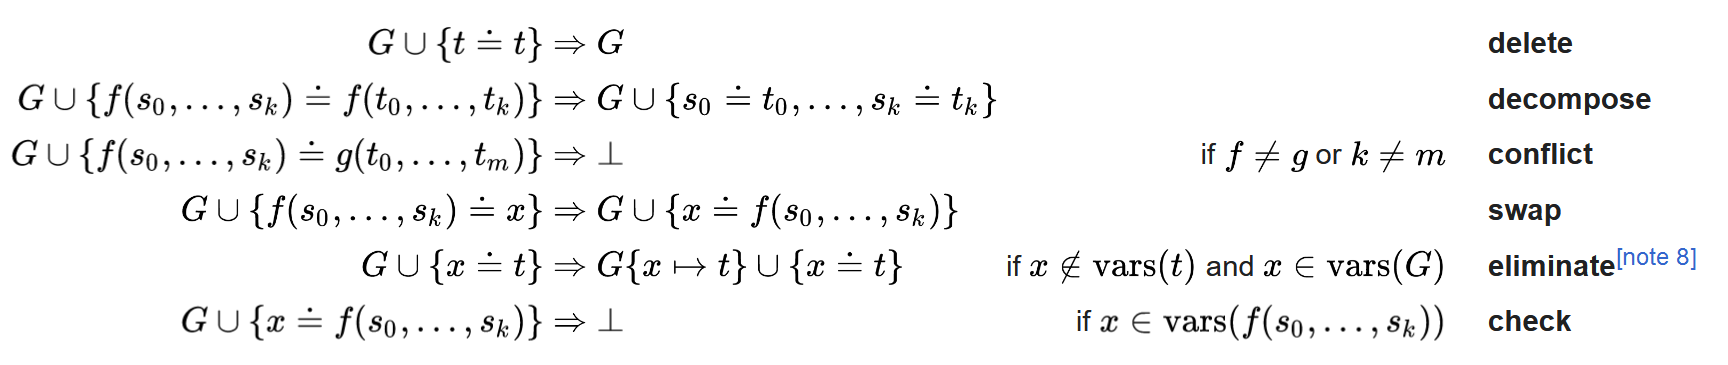

<p style='text-align: justify;'> For the proof of termination of the algorithm consider a triple $(n_{var}, n_{lhs}, n_{eqn})$ where $n_{var}$ is the number of variables that occur more than once in the equation set, $n_{lhs}$ is the number of function symbols and constants on the left hand sides of potential equations, and $n_{eqn}$ is the number of equations. When rule eliminate is applied, $n_{var}$ decreases, since x is eliminated from G and kept only in {x ≐ t}. Applying any other rule can never increase $n_{var}$ again. When rule decompose, conflict, or swap is applied, $n_{lhs}$ decreases, since at least the left hand side's outermost f disappears. Applying any of the remaining rules delete or check can't increase $n_{lhs}$, but decreases $n_{eqn}$. Hence, any rule application decreases the triple $(n_{var}, n_{lhs}, n_{eqn})$ with respect to the lexicographical order, which is possible only a finite number of times. 

In Wikipedia. https://en.wikipedia.org/wiki/Unification_(computer_science)#Proof_of_termination </p>

$(n_{var}, n_{lhs}, n_{eqn})$

$n_{var}$ is the number of variables that occur more than once in the equation set;

$n_{lhs}$ is the number of function symbols and constants on the left-hand sides of potential equations;

$n_{eqn}$ is the number of equations.


- delete $\rightarrow$ $n_{eqn}$ decreases
- decompose $\rightarrow$ $n_{lhs}$ decreases
- conflict $\rightarrow$ terminates
- swap $\rightarrow$ $n_{lhs}$ decreases
- eliminate $\rightarrow$ $n_{var}$ decreases
- ceck $\rightarrow$ terminates

In [22]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    commands = ['delete', 'decompose', 'swap', 'eliminate']
    commands_answers = ['(x1, x2, x3-1)', '(x1, x2-1, x3)', '(x1, x2-1, x3)', '(x1-1, x2, x3)']
    comment = ['n_eqn decreases', 'n_lhs decreases', 'n_lhs decreases', 'n_var decreases']
    
    print('\nx = (n_var, n_lhs, n_eqn)')
    print('while x > 0:')
    print('   command = DECIDES(delete, decompose, conflict, swap, eliminate, check)')
    
    i = 0
    ans = 'unsat'
    while i<len(commands) and ans=='unsat':
        print('   if command == %s:'%commands[i])
        print('      #%s'%comment[i])
        print('      x = %s'%commands_answers[i])
        g = commands_answers[i]
        n_g = number_of_variables(g)

        ans = solver_N_lex(n_g, g)
        
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\n\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   


x = (n_var, n_lhs, n_eqn)
while x > 0:
   command = DECIDES(delete, decompose, conflict, swap, eliminate, check)
   if command == delete:
      #n_eqn decreases
      x = (x1, x2, x3-1)
   if command == decompose:
      #n_lhs decreases
      x = (x1, x2-1, x3)
   if command == swap:
      #n_lhs decreases
      x = (x1, x2-1, x3)
   if command == eliminate:
      #n_var decreases
      x = (x1-1, x2, x3)

The program is finite.


G -> (n_var, n_lhs, n_eqn)

________________________

Following "An Efficient Unification Algorithm"

In [15]:
from z3 import *

In [33]:
def function_trusted(f:str):
    char_trusted = ['^','*','/','+','-','0','1','2','3','4','5','6','7','8','9','x','n']
    i = 0
    ok = True
    while i<len(f) and ok:
        if f[i] not in char_trusted:
            ok = False
        else:
            i += 1
    return ok

In [34]:
def number_of_variables(exp:str, subexp:str):
    #It returns the number of variables of the input expression 
    list_variable = [0]
    len_exp    = len(exp)
    len_subexp = len(subexp)
    i = 0
    while i < len_exp-len_subexp:
        if exp[i:i+len_subexp]==subexp:
            i += len_subexp
            variable = '0'
            while i<len_exp and exp[i] in ['0','1','2','3','4','5','6','7','8','9']:
                variable += exp[i]
                i += 1
            list_variable += [int(variable)]
        else:
            i+=1
            
    return max(list_variable)

In [39]:
number_of_variables('(nn3, nn5, n1)', 'n')

5

In [35]:
def solver_N_lex(n_x:int, n_n:int, n_nn:int, G:str) -> str:
    #It returns the SMT value of not(g(x)<x) (unsat, sat or unkown)    
    #G is of the form (..., ..., ... ..., ...)
    
    s = Solver()
    
    #declaração das constantes
    nn = Int('nn')
    s.add(nn>0)
    for i in range(n_n):
        exec("n%d = Int('n%d')"%(i+1,i+1))
    for i in range(n_nn):
        exec("nn%d = Int('nn%d')"%(i+1,i+1))
        exec("s.add(Or(nn%d > 0, nn%d == 0))"%(i+1, i+1))        
    for i in range(n_x):
        exec("x%d = Int('x%d')"%(i+1,i+1))
        exec("s.add(x%d > 0)"%(i+1))
        
    #retirar espaços a G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #retirar os parêntesis
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projeção 1 de g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projeção m de g
    
    for function_g in gs:
        assert function_trusted(function_g)
 
    formula = 'Or(' # (g1<x1) or (g1==x1 and g2<x2) or ... or (g1==x1 and g2==x2 and ... and g(n-1)==x(n-1) and gn<xn)
    for i in range(1, n_x+1):
        if i==1:
            aux = '(eval(gs[0])<x1)'
        else:
            aux = 'And(' #for example (x1=g1 and x2=g2 and x3<g3)
            for j in range(1, i):
                if j<i-1:
                    aux += 'eval(gs[%d])==x%d, '%(j-1,j)
                else:
                    aux += 'eval(gs[%d])==x%d'%(j-1,j)
            aux += ', eval(gs[%d])<x%d)'%(i-1,i)
        formula += aux + ', '
    formula = formula[:-2] + ')'
    
    formula = eval(formula)
    
    s.add(Not(formula))

    return str(s.check())

In [38]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    m = int(input('m = '))
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    command = ''
    if m<6:
        for i in range(m):
            command += '%d,'%(i+1)
        command = command[:-1] #to exclude the last comma
    else:
        command = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%command)
    
    i = 1
    ans = 'unsat'
    while i<=m and ans=='unsat':
        print('   if command == %d:'%i)
        g = input('      x = ')
        n_x_g  = number_of_variables(g, 'x')
        n_nn_g = number_of_variables(g, 'nn')
        n_n    = number_of_variables(g, 'n')

        ans = solver_N_lex(n_x_g, n_n, n_nn_g, g)
        
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\n\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   

m = 4

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3,4)
   if command == 1:
      x = (x1-nn1, x2, x3-nn)
   if command == 2:
      x = (x1-nn1, x2, x3-nn)
   if command == 3:
      x = (x1-nn2, x2-2, x3+nn1)
   if command == 4:
      x = (x1-nn, x2+nn1, x3+n1)

The program is finite.


## Merging both orders

### z3 online

In [7]:
from z3 import *

In [8]:
def function_trusted(f:str):
    char_trusted = ['^','*','/','+','-','0','1','2','3','4','5','6','7','8','9','x','n']
    i = 0
    ok = True
    while i<len(f) and ok:
        if f[i] not in char_trusted:
            ok = False
        else:
            i += 1
    return ok

In [9]:
def number_of_variables(exp:str, subexp:str):
    #It returns the number of variables of the input expression 
    list_variable = [0]
    len_exp    = len(exp)
    len_subexp = len(subexp)
    i = 0
    while i < len_exp-len_subexp:
        if exp[i:i+len_subexp]==subexp:
            i += len_subexp
            variable = '0'
            while i<len_exp and exp[i] in ['0','1','2','3','4','5','6','7','8','9']:
                variable += exp[i]
                i += 1
            list_variable += [int(variable)]
        else:
            i+=1
            
    return max(list_variable)

In [54]:
def solver_N_lex(n_variables:int, F:str, G:str) -> str:
    #It returns the SMT value of not(g(x)<x) (unsat, sat or unkown)    
    #G is of the form (..., ..., ... ..., ...)
    
    s = Solver()
    
    #declaração das constantes
    n = Int('n')
    nn = Int('nn')
    s.add(nn>0)
    for i in range(n_variables):
        exec("x%d = Int('x%d')"%(i+1,i+1))
        exec("s.add(x%d > 0)"%(i+1))
        
    #retirar espaços a G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    if(g[0]=='('):
        g = g[1:-1] #retirar os parêntesis
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    if comma_index != 0:
        gs = [g[0:comma_index[0]]] #projeção 1 de g
        gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
        gs += [g[comma_index[-1]+1:]] #projeção m de g
    else:
        gs = [g]
    
    for function_g in gs:
        assert function_trusted(function_g)
    
    #retirar espaços a f
    f = ''
    for c in F:
        if c!=' ':
            f += c
    if f[0] == '(':
            f = f[1:-1] #retirar os parêntesis
            
    comma_index = [i for i in range(len(f)) if f[i]==',']
    if len(comma_index)!=0:
        fs = [f[0:comma_index[0]]] #projeção 1 de f
        fs += [f[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
        fs += [f[comma_index[-1]+1:]] #projeção m de f
    else:
        fs = [f]
    
    for function_f in fs:
        assert function_trusted(function_f)
        
    fog = f.upper() #substituir as ocorrências em f de x1 por g1(x), x2 por g2(x), etc.
    for i in range(n_variables):
        fog = fog.replace('X%d'%(i+1), gs[i])
    
    comma_index = [i for i in range(len(fog)) if fog[i]==',']
    if len(comma_index)!=0:
        fgs = [fog[0:comma_index[0]]] #projeção 1 de fog
        fgs += [fog[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
        fgs += [fog[comma_index[-1]+1:]] #projeção m de fog
    else:
        fgs = [fog]
    

    formula = 'Or(' # ((fog)1<f1) or ((fog)1==f1 and (fog)2<f2) or ... or ((fog)1==f1 and (fog)2==f2 and ... and (fog)(n-1)==f(n-1) and (fog)n<fn)
    for i in range(0, len(comma_index)+1):
        if i==0:
            aux = '(eval(fgs[0])<eval(fs[0]))'
        else:
            aux = 'And(' #for example (x1=g1 and x2=g2 and x3<g3)
            for j in range(0, i):
                if j<i-1:
                    aux += 'eval(fgs[%d])==eval(fs[%d]), '%(j,j)
                else:
                    aux += 'eval(fgs[%d])==eval(fs[%d])'%(j,j)
            aux += ', eval(fgs[%d])<eval(fs[%d]))'%(i,i)
        formula += aux + ', '
    formula = formula[:-2] + ')'
    
    formula = eval(formula)
    
    s.add(Not(formula))

    return str(s.check())

In [55]:
def main():
    #o output é 1 se o programa termina, 0 se não termina e 'unknown' caso não saiba.
    m = int(input('m = '))
    f = input('f(x) = ')
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    control = ''
    if m<6:
        for i in range(m):
            control += '%d,'%(i+1)
        control = control[:-1] #to exclude the last comma
    else:
        control = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%control)
    
    i = 1
    ans = 'unsat'
    n_f = number_of_variables(f, 'x')
    while i<=m and ans=='unsat':
        print('   if command == %d:'%i)
        g = input('      x = ')
        n_g = number_of_variables(g, 'x')

        ans = solver_N_lex(max(n_f, n_g), f, g)
        
        i += 1
    
    if ans == 'unsat':
        print('\nThe program is finite.')
        return 1
    
    elif ans == 'sat':
        print('\n\nThe programa is not finite.')
        return 0
    
    else: #ans == 'unknown'
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   

m = 3
f(x) = x1+x2+x3

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3)
   if command == 1:
      x = (x1-1,x2,x3)
   if command == 2:
      x = (x1-1,x2-1,x3+1)
   if command == 3:
      x = (x2,x1-1,x3)

The program is finite.


## Using Matrices

In [15]:
from z3 import *
import itertools

In [35]:
def product(A:list, B:list) -> list:
    n = len(A)
    res = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            
            minim = float('+inf')
            
            for k in range(n):
                aux = A[i][k]+B[k][j]
                if(aux < minim):
                    minim = aux
                    
            res[i][j] = minim
            
    return res            

In [36]:
product([[-1, 0], [float('inf'), float('inf')]], [[float('inf'), -2], [1, float('inf')]])

[[1, -3], [inf, inf]]

In [37]:
def negative_diagonalQ(A:list) -> bool:
    i = 0
    n = len(A)
    found = False
    while i<n and not found:
        if A[i][i] < 0:
            found = True
        i += 1
    return found

In [38]:
negative_diagonalQ([[1, -3], [float('inf'), float('inf')]])

False

In [55]:
def product_m_ngQ(matrix_list:list, m:int) -> bool:
    #check if any product of m matrixes satisfies negative_diagonalQ
    
    n = len(matrix_list)
    inp = [list(range(n))] * m
    product_index_list = list(itertools.product(*inp))

    len_tup = len(product_index_list)
    
    i = 0
    ok = True
    while i<len_tup and ok:
        tup = product_index_list[i]
        
        aux = matrix_list[tup[0]]
        for j in range(1, m):
            aux = product(aux, matrix_list[tup[j]])
            print(aux)
            
        if(not negative_diagonalQ(aux)):
            ok = False
        
        i += 1
    
    return ok

In [40]:
def product_up2m_ngQ(matrix_list:list, m:int) -> bool: 
    #check if any product of up to m matrixes satisfies negative_diagonalQ
    i = 1
    ok = True
    while i<=m and ok:
        ok = product_m_ngQ(matrix_list, i)
        i += 1
        
    return ok

In [41]:
c1 = [[float('inf') for _ in range(4)] for _ in range(4)]
c1[0][0] = -1
c1[2][2] = 0
c1[3][3] = 0

c2 = [[float('inf') for _ in range(4)] for _ in range(4)]
c2[0][0] = 0
c2[1][1] = -1
c2[3][3] = 0

c3 = [[float('inf') for _ in range(4)] for _ in range(4)]
c3[0][0] = 0
c3[1][1] = 0
c3[2][2] = -1

product_up2m_ngQ([c1, c2, c3], 10)

True

In [44]:
def function2matrix(G:str) -> list:
    #given function lambda (x1, x2, x3): (x1-1, x2, x3) construct its matrix
    #to_evaluate indicates what expressions will be expressed on the matrices
    #for example to_evaluate = [x1]
    
    #remove spaces from G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #remove parentheses
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projection 1 of g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projection m of g
    
    dim = len(comma_index) + 1 #dimension of g
    
    n = Int('n')
    for i in range(dim):
        exec("x%d = Int('x%d')"%(i+1,i+1))
    
    matrix_result = [[0 for _ in range(dim)] for _ in range(dim)]
    
    for i in range(dim):
        for j in range(dim):
            try:
                #evaluates the difference and atributes if it is an integer
                aux = gs[j] + "-" + "x%s"%(i+1)
                matrix_result[i][j] = simplify(eval(aux)).as_long()
            except AttributeError:
                #if its not an integer set it to +oo
                matrix_result[i][j] = float('inf')
                
    return matrix_result
    

In [ ]:
#Second version -> to_evaluate

def function2matrix(G:str, to_evaluate:list = []) -> list:
    #given function lambda (x1, x2, x3): (x1-1, x2, x3) construct its matrix
    #to_evaluate indicates what expressions will be expressed on the matrices
    #for example to_evaluate = [x1]
    
    #remove spaces from G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #remove parentheses
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projection 1 of g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projection m of g
    
    dim = len(comma_index) + 1 #dimension of g
    
    if len(to_evaluate)==0:
        for i in range(dim):
            to_evaluate += ["x%d"%(i+1)]
    else:
        dim = len(to_evaluate)
    
    n = Int('n')
    for i in range(dim):
        exec("x%d = Int('x%d')"%(i+1,i+1))
    
    matrix_result = [[0 for _ in range(dim)] for _ in range(dim)]
    
    for i in range(dim):
        for j in range(dim):
            try:
                #evaluates the difference and atributes if it is an integer
                aux = gs[j] + "-" + "x%s"%(i+1) #x_new - x_old
                matrix_result[i][j] = simplify(eval(aux)).as_long()
            except AttributeError:
                #if its not an integer set it to +oo
                matrix_result[i][j] = float('inf')
                
    return matrix_result

In [67]:
c1 = function2matrix("(x1-n, x1+n)")
c1

[[inf, inf], [inf, inf]]

In [58]:
def main():
    #the output is 1 if the program terminates, 0 if it doesn't and 'unknown' if it can't decide.
    max_exp = int(input('maximum exponent = '))
    
    m = int(input('m = '))
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    com = ''
    if m<6:
        for i in range(m):
            com += '%d,'%(i+1)
        com = com[:-1] #to exclude the last comma
    else:
        com = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%com)
    
    matrix_list = []
    
    for i in range(1, m+1):
        print('   if command == %d:'%i)
        g = input('      x = ')
        matrix_list += [function2matrix(g)]
        
    ans = product_up2m_ngQ(matrix_list, max_exp)
    
    if ans:
        print("\nUp to exponent %s it didn't found problems."%max_exp)
        return 1
    
    else:
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   

maximum exponent = 7
m = 3

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3)
   if command == 1:
      x = (x1-1, x2+n, x3, x4)
   if command == 2:
      x = (x1, x2-1, x3+n, x4)
   if command == 3:
      x = (x1, x2, x3-1, x4+n)
unknown


(x1-1, x2+n, x3, x4)
(x1, x2-1, x3+n, x4)
(x1, x2, x3-1, x4+n)

In [204]:
c1 = [['a1', 'b1'], ['c1', 'd1']]
c2 = [['min(a2+a3, b2+c3)', 'min(a2+b3, b2+d3)'], ['min(c2+a3, d2+c3)', 'min(c2+b3, d2+d3)']]


ans = [[0 for _ in range(len(c1))] for _ in range(len(c2))]

for i in range(len(c1)):
    for j in range(len(c1)):
        ans[i][j] = 'min(%s+%s, %s+%s)'%(c1[i][0], c2[0][j], c1[i][1], c2[1][j])
        
print(*ans, sep = "\n")

['min(a1+min(a2+a3, b2+c3), b1+min(c2+a3, d2+c3))', 'min(a1+min(a2+b3, b2+d3), b1+min(c2+b3, d2+d3))']
['min(c1+min(a2+a3, b2+c3), d1+min(c2+a3, d2+c3))', 'min(c1+min(a2+b3, b2+d3), d1+min(c2+b3, d2+d3))']


In [ ]:
(c1 c2) c3 = ['min(min(a1+a2, b1+c2)+a3, min(a1+b2, b1+d2)+c3)', 'min(min(a1+a2, b1+c2)+b3, min(a1+b2, b1+d2)+d3)']
             ['min(min(c1+a2, d1+c2)+a3, min(c1+b2, d1+d2)+c3)', 'min(min(c1+a2, d1+c2)+b3, min(c1+b2, d1+d2)+d3)']

    
c1 (c2 c3) = ['min(a1+min(a2+a3, b2+c3), b1+min(c2+a3, d2+c3))', 'min(a1+min(a2+b3, b2+d3), b1+min(c2+b3, d2+d3))']
             ['min(c1+min(a2+a3, b2+c3), d1+min(c2+a3, d2+c3))', 'min(c1+min(a2+b3, b2+d3), d1+min(c2+b3, d2+d3))']

In [17]:
import random

In [403]:
a1 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
a2 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
a3 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
b1 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
b2 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
b3 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
c1 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
c2 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
c3 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
d1 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
d2 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')
d3 = random.randint(-100, 100) if random.randint(-100, 100) < 70 else float('inf')

[[min(min(a1+a2, b1+c2)+a3, min(a1+b2, b1+d2)+c3), min(min(a1+a2, b1+c2)+b3, min(a1+b2, b1+d2)+d3)], [min(min(c1+a2, d1+c2)+a3, min(c1+b2, d1+d2)+c3), min(min(c1+a2, d1+c2)+b3, min(c1+b2, d1+d2)+d3)]] == [[min(a1+min(a2+a3, b2+c3), b1+min(c2+a3, d2+c3)), min(a1+min(a2+b3, b2+d3), b1+min(c2+b3, d2+d3))], [min(c1+min(a2+a3, b2+c3), d1+min(c2+a3, d2+c3)), min(c1+min(a2+b3, b2+d3), d1+min(c2+b3, d2+d3))]]

True

In [11]:
ans = ['min{a+min{a+min{a+min{2a, b+c}, b+c+min{a, d}}, b+min{c+min{2a, b+c}, d+c+min{a, d}}}, b+min{c+min{a+min{2a, b+c}, b+c+min{a, d}}, d+min{c+min{2a, b+c}, d+c+min{a, d}}}}', 'min{a+min{a+min{a+b+min{a, d}, b+min{c+b, 2d}}, b+min{c+b+min{a, d}, d+min{c+b, 2d}}}, b+min{c+min{a+b+min{a, d}, b+min{c+b, 2d}}, d+min{c+b+min{a, d}, d+min{c+b, 2d}}}}']
['min{c+min{a+min{a+min{2a, b+c}, b+c+min{a, d}}, b+min{c+min{2a, b+c}, d+c+min{a, d}}}, d+min{c+min{a+min{2a, b+c}, b+c+min{a, d}}, d+min{c+min{2a, b+c}, d+c+min{a, d}}}}', 'min{c+min{a+min{a+b+min{a, d}, b+min{c+b, 2d}}, b+min{c+b+min{a, d}, d+min{c+b, 2d}}}, d+min{c+min{a+b+min{a, d}, b+min{c+b, 2d}}, d+min{c+b+min{a, d}, d+min{c+b, 2d}}}}']

In [ ]:
[['min{2a, b+c}', 'min{a+b, b+d}'], 
 ['min{c+a, d+c}', 'min{c+b, 2d}']]

[['min{a+min{2a, b+c}, b+c+min{a, d}}', 'min{a+b+min{a, d}, b+min{c+b, 2d}}'], 
 ['min{c+min{2a, b+c}, d+c+min{a, d}}', 'min{c+b+min{a, d}, d+min{c+b, 2d}}']]

[['min{a+min{a+min{2a, b+c}, b+c+min{a, d}}, b+c+min{min{2a, b+c}, d+min{a, d}}}', 'b+min{a+min{a+min{a, d}, min{c+b, 2d}}, min{c+b+min{a, d}, d+min{c+b, 2d}}}'],
 ['c+min{min{a+min{2a, b+c}, b+c+min{a, d}}, d+min{min{2a, b+c}, d+min{a, d}}}', 'min{c+b+min{a+min{a, d}, min{c+b, 2d}}, d+min{c+b+min{a, d}, d+min{c+b, 2d}}}']]



In [14]:
c1 = [['a1', 'b1'], ['c1', 'd1']]
c2 = [['a2', 'b2'], ['c2', 'd2']]

ans = [[0 for _ in range(len(c1))] for _ in range(len(c2))]

for i in range(len(c1)):
    for j in range(len(c1)):
        ans[i][j] = 'min{%s+%s, %s+%s}'%(c1[i][0], c2[0][j], c1[i][1], c2[1][j])
        
print(*ans, sep = "\n")

['min{a1+a2, b1+c2}', 'min{a1+b2, b1+d2}']
['min{c1+a2, d1+c2}', 'min{c1+b2, d1+d2}']


_Lema_: Se $C$ for uma matriz $2 \times 2$ com $C_{11}$, $C_{22}$$<0$, então $C^n$ tem elemento negativo na diagonal, $\forall n$.

_Dem_: Indução em $n$.

_____________

_Lema_: Dadas $C_1$, ..., $C_m$ matriz $n \times n$. Então não é decidível se um qualquer produto de matrizes tem um elemento negativo na diagonal.

In [ ]:
a1<0 && b1+c1<0

a1<0 && d1<0

b1+c1<0 && d1<0

In [90]:
def product(A:list, B:list) -> list:
    n = len(A)
    res = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            minim = float('+inf')
            
            for k in range(n):
                print(str(i)+' '+str(k)+' '+str(j))
                aux = A[i][k]+B[k][j]
                if(aux < minim):
                    minim = aux
                    
            res[i][j] = minim
            
    return res            

In [20]:
a = [[1, 1],[1, 1]]
print(str(product(a,a))+' = '+str(a))

[[2, 2], [2, 2]] = [[1, 1], [1, 1]]


In [92]:
n = 3
for i in range(2**(n**2)):
    x = '0'*(2**n-len(bin(i)[2:]))+bin(i)[2:]
    b = [1 if xx=='0' else float('inf') for xx in x]
    
    
    a = [[] for _ in range(n)]
    j = 0
    k = 0
    while(k<n):
        a[k] = b[j:j+n]
        j += n
        k+=1;
    
    a_inf_ind = [(j,jj) for j in range(len(a)) for jj in range(len(a[j])) if a[j][jj]!='1']
    print(len(a[0]))
    print(a)
    bb = product(a,a)
    bb_inf_ind = [(j,jj) for j in range(len(bb)) for jj in range(len(bb[j])) if bb[j][jj]!='1']
    
    if a_inf_ind == bb_inf_ind:
        for j in range(len(a)):
            print(*a[j])
            
    print('\n')

3
[[1, 1, 1], [1, 1, 1], [1, 1]]
0 0 0
0 1 0
0 2 0
0 0 1
0 1 1
0 2 1
0 0 2
0 1 2
0 2 2


IndexError: list index out of range

### At most B(M)

In [24]:
def product(A:list, B:list) -> list:
    n = len(A)
    res = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            
            minim = float('+inf')
            
            for k in range(n):
                aux = A[i][k]+B[k][j]
                if(aux < minim):
                    minim = aux
                    
            res[i][j] = minim
            
    return res            

In [25]:
def negative_diagonalQ(A:list) -> bool:
    i = 0
    n = len(A)
    found = False
    while i<n and not found:
        if A[i][i] < 0:
            found = True
        i += 1
    return found

In [26]:
def product_m_ngQ(matrix_list:list, m:int) -> bool:
    #check if any product of m matrixes satisfies negative_diagonalQ
    
    n = len(matrix_list)
    inp = [list(range(n))] * m
    product_index_list = list(itertools.product(*inp))

    len_tup = len(product_index_list)
    
    i = 0
    ok = True
    while i<len_tup and ok:
        tup = product_index_list[i]
        
        aux = matrix_list[tup[0]]
        for j in range(1, m):
            aux = product(aux, matrix_list[tup[j]])
            
        if(not negative_diagonalQ(aux)):
            ok = False
        
        i += 1
    
    return ok

In [27]:
def product_up2m_ngQ(matrix_list:list, m:int) -> bool: 
    #check if any product of up to m matrixes satisfies negative_diagonalQ
    i = 1
    ok = True
    while i<=m and ok:
        ok = product_m_ngQ(matrix_list, i)
        i += 1
        
    return ok

In [28]:
def function2matrix(G:str, to_evaluate:list = []) -> list:
    #given function lambda (x1, x2, x3): (x1-1, x2, x3) construct its matrix
    #to_evaluate indicates what expressions will be expressed on the matrices
    #for example to_evaluate = [x1]
    
    #remove spaces from G
    g = ''
    for c in G:
        if c!=' ':
            g += c
    g = g[1:-1] #remove parentheses
    
    comma_index = [i for i in range(len(g)) if g[i]==',']
    gs = [g[0:comma_index[0]]] #projection 1 of g
    gs += [g[comma_index[i]+1:comma_index[i+1]] for i in range(len(comma_index)-1)]
    gs += [g[comma_index[-1]+1:]] #projection m of g
    
    dim = len(comma_index) + 1 #dimension of g
    
    if len(to_evaluate)==0:
        for i in range(dim):
            to_evaluate += ["x%d"%(i+1)]
    else:
        dim = len(to_evaluate)
    
    n = Int('n')
    for i in range(dim):
        exec("x%d = Int('x%d')"%(i+1,i+1))
    
    matrix_result = [[0 for _ in range(dim)] for _ in range(dim)]
    
    for i in range(dim):
        for j in range(dim):
            try:
                #evaluates the difference and atributes if it is an integer
                aux = gs[j] + "-" + "x%s"%(i+1) #x_new - x_old
                matrix_result[i][j] = simplify(eval(aux)).as_long()
            except AttributeError:
                #if its not an integer set it to +oo
                matrix_result[i][j] = float('inf')
                
    return matrix_result

We next derive some combinatorial bounds for irreducible multipaths, leading to the desired finite search space for the decision problem. For simplicity in calculations, we assume that 
- all functions in the subject program have the same number $k$ of parameters. 
- We will use $m$ for the number of functions, and 
- $\Delta$ for the maximum absolute value of any size-change label in $G$ (we may assume that both positive and negative labels are present, for otherwise the problem is at most as hard as plain SCT).

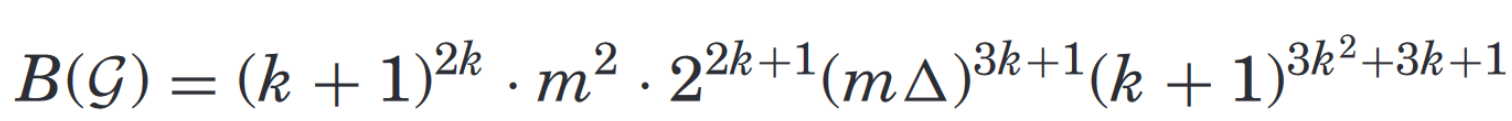

$B(\mathcal{G}) = (k+1)^{2k} m^2 2^{2k+1} (m \Delta)^{3k+1}(k+1)^{3k^2+3k+1}$

f n variables and m × m.
∆ the maximum absolute value of a matrix.

In [60]:
n = 3
m = n
delta = 1

(n+1)**(2*n) * m**2 * 2**(2*n+1) * (m*delta)**(3*n+1) * (n+1)**(3*n**2+3*n+1)

5263136739342894229381323813814272

In [47]:
def B(matrix_list:list) -> int:
    n = len(matrix_list)
    m = len(matrix_list)
    delta = max([abs(m[i][j]) for m in matrix_list for i in range(len(m)) for j in range(len(m[i])) if m[i][j]<float('inf')])
    
    res = (n+1)**(2*n) * m**2 * 2**(2*n+1) * (m*delta)**(3*n+1) * (n+1)**(3*n**2+3*n+1)
    
    return res

In [76]:
%%time

def main():
    #the output is 1 if the program terminates, 0 if it doesn't and 'unknown' if it can't decide.
    
    m = int(input('m = '))
    
    print('\nx = (input(Z), ..., input(Z))')
    print('while x > 0:')
    com = ''
    if m<6:
        for i in range(m):
            com += '%d,'%(i+1)
        com = com[:-1] #to exclude the last comma
    else:
        com = '1, 2, ..., %d, %d'%(m-1,m)

    print('   command = input(%s)'%com)
    
    matrix_list = []
    
    for i in range(1, m+1):
        print('   if command == %d:'%i)
        g = input('      x = ')
        matrix_list += [function2matrix(g)]
    
    print(matrix_list)
    max_exp = B(matrix_list)
    print(max_exp)
        
    ans = product_up2m_ngQ(matrix_list, max_exp)
    
    if ans:
        print("The program is finite.")
        return 1
    
    else:
        print('unknown')
        return 'unknown'
    
if __name__ == "__main__":
    main()   

m = 3

x = (input(Z), ..., input(Z))
while x > 0:
   command = input(1,2,3)
   if command == 1:
      x = (x1-1, x2+1, x3+1)
   if command == 2:
      x = (x1+1, x2-1, x3+1)
   if command == 3:
      x = (x1+1, x2+1, x3-1)
[[[-1, inf], [inf, 1]], [[1, inf], [inf, -1]], [[1, inf], [inf, 1]]]
5263136739342894229381323813814272
unknown
CPU times: user 0 ns, sys: 46.9 ms, total: 46.9 ms
Wall time: 17 s


In [ ]:
m = 1

x = (input(Z), ..., input(Z))
while x > 0:
    command = input(1)
    if command == 1:
        x = (x1-1,)
        
[[[-1, inf], [inf, inf]]]
4096
The program is finite.
CPU times: user 31.3 s, sys: 0 ns, total: 31.3 s
Wall time: 32.1 s


In [ ]:
m = 2

x = (input(Z), ..., input(Z))
while x > 0:
    command = input(1,2)
    if command == 1:
        x = (x2-1, x1+3)
    if command == 2:
        x = (x1-0,x2-10)
        
[[[inf, 3], [-1, inf]], [[0, inf], [inf, -10]]]
15424418419015680000000
unknown
CPU times: user 46.9 ms, sys: 93.8 ms, total: 141 ms
Wall time: 13 s